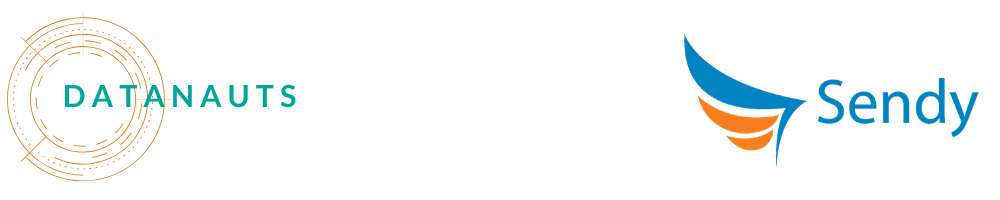

# Sendy Logistics Challenge

Logistics is fundamental to the success of a business. 

It is reported that in Africa, logistics add an average of <a href="https://www.bcg.com/publications/2019/how-online-marketplaces-can-power-employment-africa.aspx">320%</a> to a manufactured good’s cost. Sendy is a logistics platform servicing East Africa and aims to help businesses and enterprises grow through efficient and affordable logistics.

Sendy is trying to predict accurate arrival times that will assist businesses in improving logistic operations and communicate accurate times to customers awaiting deliveries. Data is key in this endeavour and this project aims to use the given data to build and train a model to make these arrival time predictions. practical solutions for Africa’s dynamic transportation needs.

# Mission Objective

The objective of this project is to build a model that will predict a response variable, 'Time from Pickup to Arrival' (Delivery time) for orders, given an unseen data set. The model will be trained using data containing a number of predictor variables or 'features'. 

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data 

Four .csv files were provided: "Train.csv", "Test.csv" & "Riders.csv" as well as a set of Variable definitions. Let's import these datasets/files.

In [2]:
train_raw = pd.read_csv('Train.csv') #import each .csv file
test_raw = pd.read_csv('Test.csv')
riders_raw = pd.read_csv('Riders.csv')
Var_Def = pd.read_csv('VariableDefinitions.csv')

__Great! Let's build a model!__

# Exploratory Data Analysis

__Hold on!__ Exploratory Data Analysis is vital in determining our data structure; potential patterns & relationships between the variables in the dataset as well as ascertaining whether our dataset is in the best format for processing by the model we'll eventually be building. We've divided EDA into the following sections: Completeness, Data Types & Initial Variable Selection & Visualisation. Once we have 'the lay of the land' we'll move on to Preprocessing the datasets as required for the regression method being used. 

## Completeness of the Data
Quality of a dataset is dependent on completeness. Let's investigate which variables have those pesky null values and figure out a way forward to handle them.

In [3]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

In [4]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
Order No                                7068 non-null object
User Id                                 7068 non-null object
Vehicle Type                            7068 non-null object
Platform Type                           7068 non-null int64
Personal or Business                    7068 non-null object
Placement - Day of Month                7068 non-null int64
Placement - Weekday (Mo = 1)            7068 non-null int64
Placement - Time                        7068 non-null object
Confirmation - Day of Month             7068 non-null int64
Confirmation - Weekday (Mo = 1)         7068 non-null int64
Confirmation - Time                     7068 non-null object
Arrival at Pickup - Day of Month        7068 non-null int64
Arrival at Pickup - Weekday (Mo = 1)    7068 non-null int64
Arrival at Pickup - Time                7068 non-null object
Pickup - Day of Month                   7068 n

In [5]:
riders_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
Rider Id          960 non-null object
No_Of_Orders      960 non-null int64
Age               960 non-null int64
Average_Rating    960 non-null float64
No_of_Ratings     960 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


### Initial Observations
- Both the train & test data sets have missing values for the 'Temperature' & 'Precipitation' columns. The values for the train data should be imputed using an appropriate method. Approximately 20% of the Temperature values are missing in both the Test & Train data sets. Replacing the NaN with the average would therefore be a reasonable assumption. Approximately 97% of the Precipitation values are missing. Imputation of the NaN values could be achieved either via assuming zero precipitation for those Order times, or imputation by mode. 

- As the data has already been split into training & test sets we can go ahead and impute the values for each set. It's best practice to impute values after the split to ensure a fair test of the model that will eventually be built.

- The riders.csv file has no missing values. Phew! There are 960 Sendy Riders and it looks as though the riders data can be joined to the test & train data.

- Side Note: The column names for the test and train data could do with some formatting to get rid of spaces between strings, but perhaps we'll leave this as is to match the submission file format.

__Summary: impute missing temperature and precipitation values. Join riders to both test & train.__

## Data Types & Initial Variable Selection

_Through the looking glass & What ~~Alice~~ the Datanauts found there..._

Woah! 29 Variables in the train dataset alone!... Let's peer through the looking-glass and inspect each dataset to ascertain which variables could potentially be dropped. We'll pay close attention to any categorical data - specifically 'Order No', 'User Id', 'Vehicle Type', 'Personal or Business', Rider Id and the Various 'Time' data.

Also, how does the Riders data fit into the picture? Let's go ahead and join the Riders data to both the test and train sets. We'll be using pandas as the primary tool to examine the data.

In [128]:
# Join riders to test & train data and initialise working dataframes

train = train_raw.merge(riders_raw, how="left", on = "Rider Id") 
test = test_raw.merge(riders_raw, how="left", on = "Rider Id")

In [129]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [130]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


### Observations

- The train data set has four additional columns centred arround the arrival time of the order: 'Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)', 'Arrival at Destination - Time', 'Time from Pickup to Arrival'. Other than that the columns are identical. This is expected as if we had these columns present in the Test set, we wouldnt have a response variable to predict!

- It is anticipated that the Rider variables such as 'No_Of_Orders' could be influential in predicting the response variable. What's that you say...? _"all this does is increase the No. of variables in both sets!"..._ __Yes, but there are definitely some variables that can be removed!__

In [131]:
# Vehicle Type
print(train_raw['Vehicle Type'].value_counts())
print(test_raw['Vehicle Type'].value_counts())

Bike    21201
Name: Vehicle Type, dtype: int64
Bike    7068
Name: Vehicle Type, dtype: int64


In [141]:
# Order No. 
print(str(train_raw['Order No'].nunique()) + ' unique Order Numbers in train dataset')
print(str(test_raw['Order No'].nunique()) + ' unique Order Numbers in test dataset')

21201 unique Order Numbers in train dataset
7068 unique Order Numbers in test dataset


The only vehicle type included in this dataset is 'Bike'. We could leave this in but it really serves no purpose in the model, so we'll __drop 'Vehicle Type__, with the caveat that this model's predicitive capabilities extend only to deliveries by bike. 

What about the Identifier columns like Riders, Orders & User? As an example, 'Order No' values corresponds to the number of rows in each dataframe. 'Order No' therefore serves as purely an identifier column and would theoretically have no purpose in the model. We do however need the Order No's preserved for the submission data file, so instead of dropping the data, we'll extract and store the data in new dataframes. 

Although there a multiple observations (orders) per rider, we can also go ahead and drop the Rider_Id as the metrics associated with the rider delivering the order are now inlcuded for every data entry. The same principle applies to user Id, user specific information such as the type of order are included included in the variable 'Personal & Business'. __Right! That's all the Id columns taken care of by dropping them from the dataset.__

It seems that the split of Business to Personal is __80/20__. The effect that the type of the order would have on delivery time would need further analysis, so let's keep this for now. The category would also have to be ___'one hot encoded'___ to a numeric data type but more about that later.

In [143]:
# Business or Personal
print(train_raw['Personal or Business'].value_counts())
print(test_raw['Personal or Business'].value_counts())

Business    17384
Personal     3817
Name: Personal or Business, dtype: int64
Business    5780
Personal    1288
Name: Personal or Business, dtype: int64


__Okay, now about those Day of week, Day of Month and Time variables (15 & 12 variables in the train & test datasets respectively!):__

Each data entry reports a __Day of Month, Weekday & Time__ for various stages in the Order process. 

On Visual inspection it seems as though the Day of Month and Weekday that an Order is Placed, Confirmed, Arrival at Pick up, Pick up, Arrival at Destination is the same i.e Same Day Delivery _(Take a bow Sendy!)_. 

Let's confirm that and if that is the case, we only need to retain one column of Day of Month & Weekday per category. We'll Check the first stage(Order Placement) with the last available stage for both Datasets (Arrival at Destination).

In [144]:
print((train_raw['Placement - Day of Month'] == train_raw['Pickup - Day of Month']).value_counts())

True     21199
False        2
dtype: int64


Okay, so it seems like our assumption is valid for ~ 99% of the train data. Let's do a quick check on the test data:

In [145]:
print((test_raw['Placement - Day of Month'] == test_raw['Pickup - Day of Month']).value_counts())

True    7068
dtype: int64


__100%__ same day delivery! Wonderful! That means that all the information relating to Order Stages before 'Pickup' is redundant.
    
It also stands to reason that the only possible time related variables worth keeping when measuring a delivery time, are the ones that measure time from the moment the Order is picked up for delivery. In this way the logic to drop these variables is not flawed, even if same day delivery is not possible for an order. We will therefore __keep a single 'Day of Month', 'Weekday' and 'Time' column for 'Pickup', which is the stage where the driver leaves for delivering the Order.__ Thats 12 Variables to drop from the train data and 9 from the test data. All that's left to do is convert the 'Pickup - Time' from an object type to a date_time object. Let's create a copy of each datasets to preserve the original raw data and execute the recommendations above to streamline the dataset for Data Visualisation.

In [146]:
train_df = train.drop(['Order No', 'Rider Id', 'User Id', 'Vehicle Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time', 
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time'], axis='columns')

In [147]:
test_df = test.drop(['Order No', 'User Id', 'Rider Id', 'Vehicle Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time'], axis='columns')

In [150]:
# converting object data types for Pickup Times to date_time 
train_df['Pickup - Time'] = pd.to_datetime(train_df['Pickup - Time'])
test_df['Pickup - Time'] = pd.to_datetime(test_df['Pickup - Time'])

train_df['Pickup - Time'] = train_df['Pickup - Time'].apply(lambda time: time.hour)
test_df['Pickup - Time'] = test_df['Pickup - Time'].apply(lambda time: time.hour)

Let's take a look at how are dataframes are shaping up. Looking good! We've removed the variables that don't add value or are redundant and converted all data types to numeric form with exception of Categorical data that will be encoded during pre-processing. But what about those Null values? 

In [151]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 17 columns):
Platform Type                   21201 non-null int64
Personal or Business            21201 non-null object
Pickup - Day of Month           21201 non-null int64
Pickup - Weekday (Mo = 1)       21201 non-null int64
Pickup - Time                   21201 non-null int64
Distance (KM)                   21201 non-null int64
Temperature                     16835 non-null float64
Precipitation in millimeters    552 non-null float64
Pickup Lat                      21201 non-null float64
Pickup Long                     21201 non-null float64
Destination Lat                 21201 non-null float64
Destination Long                21201 non-null float64
Time from Pickup to Arrival     21201 non-null int64
No_Of_Orders                    21201 non-null int64
Age                             21201 non-null int64
Average_Rating                  21201 non-null float64
No_of_Ratings                 

In [152]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 16 columns):
Platform Type                   7068 non-null int64
Personal or Business            7068 non-null object
Pickup - Day of Month           7068 non-null int64
Pickup - Weekday (Mo = 1)       7068 non-null int64
Pickup - Time                   7068 non-null int64
Distance (KM)                   7068 non-null int64
Temperature                     5631 non-null float64
Precipitation in millimeters    199 non-null float64
Pickup Lat                      7068 non-null float64
Pickup Long                     7068 non-null float64
Destination Lat                 7068 non-null float64
Destination Long                7068 non-null float64
No_Of_Orders                    7068 non-null int64
Age                             7068 non-null int64
Average_Rating                  7068 non-null float64
No_of_Ratings                   7068 non-null int64
dtypes: float64(7), int64(8), object(1)
memory 

### Imputation of Missing Variables

#### 1.Precipitation

As mentioned earlier, approximately 97% of Precipitation data is missing. We could discard the variable as this is a sizeable chunk of data missing. We could also impute the value by assuming that there was zero precipitation on the day and was possibly erroneously not recorded as a null value. Precipitation levels or simply put, rainfall, would definitely be an influential predictor of delivery time as inclement weather can affect traffic & road conditions, thus influencing delivery time. To have this much data 'missing' is unusual when recordings range from a couple millimeters to a maximum of 100mm! 

We therfore make the assumption that the missing values were acually 0mm precipitation readings.

We'd definitely recommend referring back to the Client to confirm our assumption, and to ensure it is recorded consistently in the future!

In [161]:
# check % null values for precipitation
prec_nulls_perc_train = (train_df['Precipitation in millimeters'].isnull().sum()*100)/len(train_df)
prec_nulls_perc_test = (test_df['Precipitation in millimeters'].isnull().sum()*100)/len(test_df)

print(prec_nulls_perc_train)
print(prec_nulls_perc_train)

97.39634922880997
97.39634922880997


In [162]:
# Precipitation Analysis
print(train_df['Precipitation in millimeters'].describe())
print(test_df['Precipitation in millimeters'].describe())

count    552.000000
mean       7.905797
std       17.089971
min        0.100000
25%        1.075000
50%        2.900000
75%        4.900000
max       99.100000
Name: Precipitation in millimeters, dtype: float64
count    199.000000
mean       6.651759
std       14.085439
min        0.100000
25%        1.100000
50%        2.900000
75%        4.950000
max       99.100000
Name: Precipitation in millimeters, dtype: float64


In [163]:
# fill precipitation null values with 0
train_df['Precipitation in millimeters'].fillna(0,inplace=True)
test_df['Precipitation in millimeters'].fillna(0,inplace=True)

#### 2. Temperature

A far more acceptable amount of values are missing for the Temperature variable (approximately 20%). We'll go ahead and impute this using the mean for each dataset.

In [164]:
# Check % null values for temperature
temp_nulls_perc_train = (train_df['Temperature'].isnull().sum()*100)/len(train_df)
temp_nulls_perc_test = (test_df['Temperature'].isnull().sum()*100)/len(test_df)

print(temp_nulls_perc_train)
print(temp_nulls_perc_train)

20.593368237347295
20.593368237347295


In [165]:
# impute temperature values by mean
train_df.Temperature.fillna(train_df.Temperature.mean(),inplace=True)
test_df.Temperature.fillna(test_df.Temperature.mean(),inplace=True)

# Preprocessing

Our data looks great however there are still some issues to take care of before it's ready for modeling.

1. Categorical variables like 'Business & Personal' need to be one hot encoded into a numeric form. The dummy variable needs to be dropped to prevent multi-colinearity.

2. Because we have different variables measured in different units and in different ranges, we need to scale each variable so that the differences in scales do not cause inaccuracies as the model would inherently prioritise variables with higher ranges. This will be done for linear regression models that use regularisation.

Our approach will be to separate the variables that require encoding from those that need scaling. Note that the predictor variable should not be scaled.

In [168]:
# encode 'Personal or Business' columns
train_encoded = pd.get_dummies(train_df, columns=['Personal or Business'], drop_first=True)
test_encoded = pd.get_dummies(test_df, columns=['Personal or Business'], drop_first=True)

In [169]:
train_encoded.head()

,Platform Type,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Personal or Business_Personal
0,3,9,5,10,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549,0
1,3,12,5,11,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69,1
2,3,30,2,12,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,455,1023,242,12.5,114,0
3,3,15,5,9,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113,0
4,1,13,1,10,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872,14.1,533,1


In [170]:
test_encoded.head()

,Platform Type,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Personal or Business_Personal
0,3,27,3,17,8,23.24612,0.0,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,171,0
1,3,17,5,13,5,23.24612,0.0,-1.272639,36.794723,-1.277007,36.823907,488,273,14.4,45,0
2,3,27,4,11,5,22.80000,0.0,-1.290894,36.822971,-1.276574,36.851365,833,460,13.1,67,0
3,3,17,1,14,5,24.50000,0.0,-1.290503,36.809646,-1.303382,36.790658,487,560,13.7,44,0
4,3,11,2,11,6,24.40000,0.0,-1.281081,36.814423,-1.266467,36.792161,4761,1120,14.1,1010,0


In [171]:
# preserve encoded variables
train_bp = train_encoded['Personal or Business_Personal']
test_bp = test_encoded['Personal or Business_Personal']

In [172]:
# Initialise variables to be scaled 
train_scale = train_encoded.drop(['Time from Pickup to Arrival'], axis='columns')
test_scale = test_encoded.copy() 

In [173]:
# import sklearn preprocessing transformers
from sklearn.preprocessing import StandardScaler 

In [174]:
# create scaler & encoder objects
scaler = StandardScaler()

In [175]:
# scale and encode required columns
train_scaled = scaler.fit_transform(train_scale) 
test_scaled = scaler.fit_transform(test_scale)

In [176]:
# combine scaled and encoded variables for test & train
train_final = pd.DataFrame(train_scaled,columns=train_scale.columns)
test_final = pd.DataFrame(test_scaled,columns=train_scale.columns)

In [177]:
train_final['Personal or Business_Personal'] = train_bp
test_final['Personal or Business_Personal'] = test_bp

# Model 

Several regression types have been selected for creating this model and for the sake of comparison.

## Multiple Linear Regression
Linear regression model for multiple predictor variables.

In [214]:
# assign predictors and response
X = train_encoded.drop('Time from Pickup to Arrival', axis='columns')
y = train_encoded['Time from Pickup to Arrival']

In [181]:
# split train dataset into (validation)test and train sets
from sklearn.model_selection import train_test_split
X_train, X_vtest, y_train, y_vtest = train_test_split(X, y, test_size=0.20, random_state=101)

In [182]:
# import module
from sklearn.linear_model import LinearRegression 
# create model object
lm = LinearRegression()
# train multiple regression model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Decision Tree Regression

In [183]:
# import module
from sklearn.tree import DecisionTreeRegressor
# create model object
tree_reg = DecisionTreeRegressor()
# train decision tree regression model 
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## Random Forest Regression

In [184]:
# train random forest regression model 
from sklearn.ensemble import RandomForestRegressor
# create model object
forest_reg = RandomForestRegressor(n_estimators = 500)
# train random forest regression model 
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Model Evaluation                        

In [185]:
# make training set predictions for each model type
y_pred_tr_lm = lm.predict(X_train)
y_pred_tr_dtree = tree_reg.predict(X_train)
y_pred_tr_forest = forest_reg.predict(X_train)

In [186]:
# make test set predictions for each model type
y_pred_vt_lm = lm.predict(X_vtest)
y_pred_vt_dtree = tree_reg.predict(X_vtest)
y_pred_vt_forest = forest_reg.predict(X_vtest)

In [216]:
from sklearn import metrics

In [217]:
# dictionary of RMSE evaluation
rmse_dict = {'Training RMSE':
                    {
                        'Multiple Linear Regression': np.sqrt(metrics.mean_squared_error(y_train, y_pred_tr_lm)),
                        'Decision Tree': np.sqrt(metrics.mean_squared_error(y_train, y_pred_tr_dtree)),
                        'Random Forest': np.sqrt(metrics.mean_squared_error(y_train, y_pred_tr_forest))
                    },
                    'Test RMSE':
                    {
                        'Multiple Linear Regression': np.sqrt(metrics.mean_squared_error(y_vtest, y_pred_vt_lm)),
                        'Decision Tree': np.sqrt(metrics.mean_squared_error(y_vtest, y_pred_vt_dtree)),
                        'Random Forest': np.sqrt(metrics.mean_squared_error(y_vtest, y_pred_vt_forest))
                    }
                }

rmse_df = pd.DataFrame(data=rmse_dict)
rmse_df

,Training RMSE,Test RMSE
Decision Tree,0.000000,1120.733822
Multiple Linear Regression,799.700784,783.032002
Random Forest,284.941958,755.617502


### Interpretation of RMSE results 

The Decision tree model performs the best on train data, however has the largest Test error, an indication of overfitting.

The Multiple Regression model performs consistently on both train and test data (lowest variance) and also performs better with the unseen data set.

The Random Forest model has the lowest Test Error and has the lowest RMSE on the unseen data.

In [126]:
# Test Set Predict
y_pred_rf = forest_reg.predict(test_encoded)

In [127]:
# Export Random Forest model results to csv for Zindy submission
df1 = pd.DataFrame(data=test_raw['Order No'])
y_pred_rf = pd.DataFrame(data=y_pred_rf, columns=['Time from Pickup to Arrival'])
df['Time from Pickup to Arrival'] = y_pred_rf
df.to_csv("sendyrf", index=False)

## Lasso Regression
Lasso Regression is a regularisation technique used to improve model performance. It basically introduced a penalty term that adjusts the fit of the model such that it is able to generalise better and thus improves performance on unseen data. Lasso regression is able to reduce the magnitude of predictor variable coefficients and is able to shrink co-efficients all the way to zero, thereby achieving variable selection. The Lasso model is included here to ascertain if the multiple variable model can be improved.

In [215]:
# assign predictors and response for scaled df
Xs = train_final
ys = train_encoded['Time from Pickup to Arrival']
Xs.head()

,Platform Type,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Personal or Business_Personal
0,0.396406,-0.756231,1.122885,-1.126041,-0.971370,-8.873220e-01,-0.067953,-1.189424,0.509897,-0.511888,0.414159,-0.035206,0.501451,-0.090082,0.516144,0
1,0.396406,-0.415271,1.122885,-0.734131,1.145469,9.749159e-01,-0.067953,-2.294056,2.349813,-0.356757,0.070177,-0.823507,-0.998616,-0.308411,-0.675342,1
2,0.396406,1.630491,-0.791368,-0.342221,-1.147774,3.969599e-14,-0.067953,-0.878981,0.858136,-0.526672,0.379588,-0.425228,-1.148623,-1.509220,-0.563640,0
3,0.396406,-0.074311,1.122885,-1.517951,-0.089354,-1.259770e+00,-0.067953,0.005523,0.563962,0.730374,-0.361289,-0.512252,-1.085218,0.674069,-0.566123,0
4,-2.802759,-0.301618,-1.429452,-1.126041,-0.089354,-2.439187e+00,-0.067953,0.487515,-0.510932,-0.357811,-0.031369,0.392929,-0.174352,0.237411,0.476428,1


In [189]:
# split train dataset into (validation)test and train sets
from sklearn.model_selection import train_test_split
Xs_train, Xs_vtest, ys_train, ys_vtest = train_test_split(Xs, ys, test_size=0.20, random_state=101)

In [192]:
# import module
from sklearn.linear_model import Lasso
# create model object
lasso = Lasso(alpha=0.01)
# train the LASSO model
lasso.fit(Xs_train, ys_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
# make training set predictions for each model
train_lasso = lasso.predict(Xs_train)

In [77]:
# make test set predictions for each model
test_lasso = lasso.predict(Xs_vtest)

In [207]:
# dictionary of results
lasso_dict = {'Training RMSE':
                    {
                        "LASSO": np.sqrt(metrics.mean_squared_error(ys_train, train_lasso))
                    },
                    'Test RMSE':
                    {
                        "LASSO": np.sqrt(metrics.mean_squared_error(ys_vtest, test_lasso))
                    }
                }

In [208]:
lasso_dict

{'Training RMSE': {'LASSO': 799.7007868306321},
 'Test RMSE': {'LASSO': 783.0330025221997}}

In [212]:
# extract coefficients from model
coeff = pd.DataFrame(lasso.coef_, Xs_train.columns, columns=['Coefficient'])
coeff.sort_values(by='Coefficient')

,Coefficient
No_Of_Orders,-155.681258
Pickup Long,-38.415726
Average_Rating,-37.201038
Destination Lat,-13.950896
Destination Long,-8.113729
Pickup - Day of Month,-3.387262
Temperature,4.349400
Age,6.124250
Pickup - Weekday (Mo = 1),7.427843
Pickup Lat,8.592235


#### Interpretation of  Lasso model results

None of the co-efficients are zero or close to zero, thereby confirming that the initial variable selection was fairly good! The RMSE results for both sets are identical to the multiple variable linear regression model. 

The top 3 influential predictor variables in terms of decreasing delivery times are: No_Of_Orders, Pickup Long, & Average_Rating. As the scaled quantities of these variables increase the Time from Pickup to Arrival decreases (shortens).

The top 3 influential predictor variables in terms of increasing delivery times are: Distance (KM), No_of_Ratings, & Personal or Business_Personal. As the scaled quantities of these variables increase the Time from Pickup to Arrival increases (lengthens).

These results intuitively make sense, for example:

- as distance travelled increases so does time taken to traverse that distance. 
- Riders with higher ratings and No_of_Orders could be considered as better performers and more experienced leading to shorter delivery times.
- Conversely, because rating a rider is optional for a customer, a customer would be more inclined to rate a rider/order when they've experienced bad service or poor delivery times than expected, thus perhaps explaining this negative correlation with Time from Pickup to Arrival.

In [87]:
# Test Set Predict
y_pred_las = lasso.predict(test_final)

In [88]:
df = pd.DataFrame(data=test_raw['Order No'])
y_pred = pd.DataFrame(data=y_pred_las, columns=['Time from Pickup to Arrival'])
df['Time from Pickup to Arrival'] = y_pred
df.to_csv("sendylasso", index=False)

## Ridge Regression (Check)

In [218]:
# import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [219]:
# create ridge model
ridge = Ridge()

In [221]:
# train the model
ridge.fit(Xs_train, ys_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [222]:
# make training set predictions for each model
train_ridge = ridge.predict(Xs_train)

In [227]:
# make test set predictions for each model
test_ridge = ridge.predict(Xs_vtest)

In [228]:
print('Ridge :', np.sqrt(metrics.mean_squared_error(ys_train, train_ridge)))

Ridge : 799.700785038395


In [229]:
print('Ridge :', np.sqrt(metrics.mean_squared_error(ys_vtest, test_ridge)))

Ridge : 783.0314930643303
